In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: EQNR
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


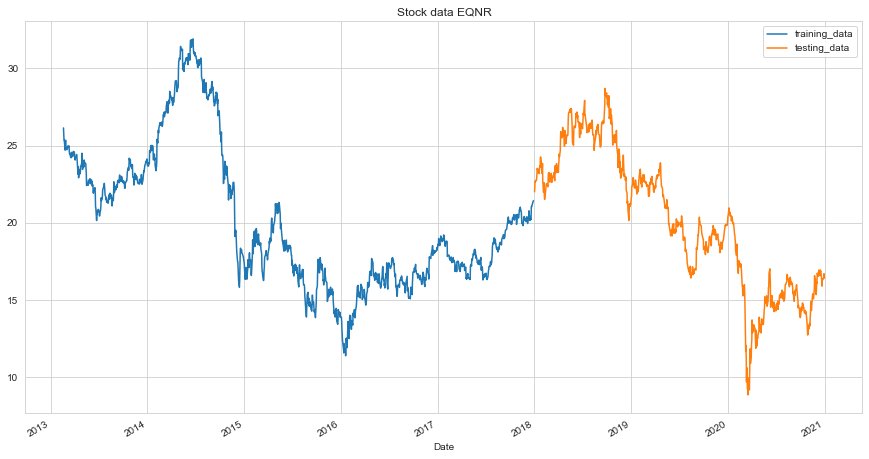

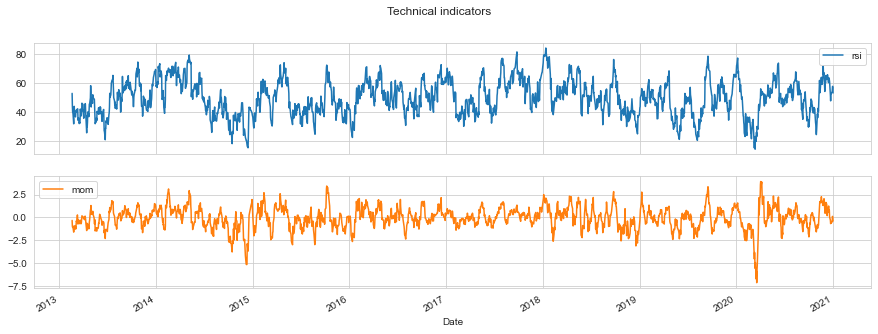

In [10]:
stock_name = 'eqnr'.upper()
industry = 'Energy'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1046.96, duration: 0:00:00.272061
episode: 2/2000, episode end value: 1063.68, duration: 0:00:00.233053
episode: 3/2000, episode end value: 1033.15, duration: 0:00:00.285065
episode: 4/2000, episode end value: 1068.69, duration: 0:00:00.332071
episode: 5/2000, episode end value: 1191.96, duration: 0:00:00.298068
episode: 6/2000, episode end value: 1104.59, duration: 0:00:00.320073
episode: 7/2000, episode end value: 1062.67, duration: 0:00:00.303071
episode: 8/2000, episode end value: 1183.23, duration: 0:00:00.344078
episode: 9/2000, episode end value: 1051.06, duration: 0:00:00.343081
episode: 10/2000, episode end value: 1085.93, duration: 0:00:00.280063
episode: 11/2000, episode end value: 1163.42, duration: 0:00:00.238053
episode: 12/2000, episode end value: 1033.14, duration: 0:00:00.236050
episode: 13/2000, episode end value: 1016.32, duration: 0:00:00.231054
episode: 14/2000, episode end value: 1001.32, duration: 0:00:00.261059
episode: 15/200

episode: 117/2000, episode end value: 1052.42, duration: 0:00:00.278062
episode: 118/2000, episode end value: 1072.39, duration: 0:00:00.263061
episode: 119/2000, episode end value: 1112.83, duration: 0:00:00.265061
episode: 120/2000, episode end value: 1031.53, duration: 0:00:00.267057
episode: 121/2000, episode end value: 1223.27, duration: 0:00:00.293073
episode: 122/2000, episode end value: 1064.83, duration: 0:00:00.274511
episode: 123/2000, episode end value: 1154.49, duration: 0:00:00.283256
episode: 124/2000, episode end value: 1231.90, duration: 0:00:00.290363
episode: 125/2000, episode end value: 1158.46, duration: 0:00:00.285782
episode: 126/2000, episode end value: 1106.14, duration: 0:00:00.282067
episode: 127/2000, episode end value: 1188.40, duration: 0:00:00.271065
episode: 128/2000, episode end value: 1065.74, duration: 0:00:00.269057
episode: 129/2000, episode end value: 1149.24, duration: 0:00:00.304070
episode: 130/2000, episode end value: 1084.57, duration: 0:00:00

episode: 231/2000, episode end value: 1056.18, duration: 0:00:00.372084
episode: 232/2000, episode end value: 1142.10, duration: 0:00:00.408095
episode: 233/2000, episode end value: 1114.89, duration: 0:00:00.490107
episode: 234/2000, episode end value: 1113.81, duration: 0:00:00.392086
episode: 235/2000, episode end value: 1130.18, duration: 0:00:00.416095
episode: 236/2000, episode end value: 1127.58, duration: 0:00:00.516118
episode: 237/2000, episode end value: 1144.72, duration: 0:00:00.510113
episode: 238/2000, episode end value: 1150.03, duration: 0:00:00.494115
episode: 239/2000, episode end value: 1257.18, duration: 0:00:00.451101
episode: 240/2000, episode end value: 1065.34, duration: 0:00:00.446105
episode: 241/2000, episode end value: 1016.25, duration: 0:00:00.418094
episode: 242/2000, episode end value: 1082.31, duration: 0:00:00.453102
episode: 243/2000, episode end value: 1076.34, duration: 0:00:00.419093
episode: 244/2000, episode end value: 1155.40, duration: 0:00:00

episode: 345/2000, episode end value: 1060.04, duration: 0:00:00.438101
episode: 346/2000, episode end value: 1213.21, duration: 0:00:00.429098
episode: 347/2000, episode end value: 1084.54, duration: 0:00:00.384087
episode: 348/2000, episode end value: 1096.91, duration: 0:00:00.447100
episode: 349/2000, episode end value: 1230.93, duration: 0:00:00.462328
episode: 350/2000, episode end value: 1153.88, duration: 0:00:00.385457
episode: 351/2000, episode end value: 1065.49, duration: 0:00:00.438100
episode: 352/2000, episode end value: 1098.03, duration: 0:00:00.476105
episode: 353/2000, episode end value: 1151.25, duration: 0:00:00.458105
episode: 354/2000, episode end value: 1094.69, duration: 0:00:00.419096
episode: 355/2000, episode end value: 1189.95, duration: 0:00:00.488608
episode: 356/2000, episode end value: 1087.28, duration: 0:00:00.421017
episode: 357/2000, episode end value: 1071.45, duration: 0:00:00.476314
episode: 358/2000, episode end value: 1039.49, duration: 0:00:00

episode: 459/2000, episode end value: 1202.37, duration: 0:00:00.434098
episode: 460/2000, episode end value: 1144.43, duration: 0:00:00.432099
episode: 461/2000, episode end value: 1175.91, duration: 0:00:00.413093
episode: 462/2000, episode end value: 1188.35, duration: 0:00:00.390089
episode: 463/2000, episode end value: 1128.89, duration: 0:00:00.435099
episode: 464/2000, episode end value: 1064.30, duration: 0:00:00.470127
episode: 465/2000, episode end value: 1153.47, duration: 0:00:00.386087
episode: 466/2000, episode end value: 1090.51, duration: 0:00:00.381089
episode: 467/2000, episode end value: 1150.73, duration: 0:00:00.420092
episode: 468/2000, episode end value: 1113.61, duration: 0:00:00.446101
episode: 469/2000, episode end value: 1047.08, duration: 0:00:00.429098
episode: 470/2000, episode end value: 1224.14, duration: 0:00:00.477107
episode: 471/2000, episode end value: 1125.05, duration: 0:00:00.392093
episode: 472/2000, episode end value: 1077.34, duration: 0:00:00

episode: 573/2000, episode end value: 1053.64, duration: 0:00:00.470108
episode: 574/2000, episode end value: 1153.99, duration: 0:00:00.523118
episode: 575/2000, episode end value: 1123.27, duration: 0:00:00.489673
episode: 576/2000, episode end value: 1059.18, duration: 0:00:00.487052
episode: 577/2000, episode end value: 1082.40, duration: 0:00:00.475305
episode: 578/2000, episode end value: 1043.59, duration: 0:00:00.516147
episode: 579/2000, episode end value: 1053.13, duration: 0:00:00.464104
episode: 580/2000, episode end value: 1044.47, duration: 0:00:00.501724
episode: 581/2000, episode end value: 1152.60, duration: 0:00:00.457612
episode: 582/2000, episode end value: 1044.68, duration: 0:00:00.356122
episode: 583/2000, episode end value: 1209.53, duration: 0:00:00.451240
episode: 584/2000, episode end value: 1086.37, duration: 0:00:00.396125
episode: 585/2000, episode end value: 1070.41, duration: 0:00:00.432527
episode: 586/2000, episode end value: 1104.10, duration: 0:00:00

episode: 687/2000, episode end value: 1059.91, duration: 0:00:00.406092
episode: 688/2000, episode end value: 1033.99, duration: 0:00:00.442524
episode: 689/2000, episode end value: 1121.08, duration: 0:00:00.385086
episode: 690/2000, episode end value: 1056.10, duration: 0:00:00.474109
episode: 691/2000, episode end value: 1265.94, duration: 0:00:00.404090
episode: 692/2000, episode end value: 1078.23, duration: 0:00:00.456103
episode: 693/2000, episode end value: 1247.70, duration: 0:00:00.400089
episode: 694/2000, episode end value: 1041.99, duration: 0:00:00.394679
episode: 695/2000, episode end value: 1069.94, duration: 0:00:00.459842
episode: 696/2000, episode end value: 1091.86, duration: 0:00:00.426095
episode: 697/2000, episode end value: 1036.32, duration: 0:00:00.422095
episode: 698/2000, episode end value: 1155.47, duration: 0:00:00.462105
episode: 699/2000, episode end value: 1203.07, duration: 0:00:00.490117
episode: 700/2000, episode end value: 1193.16, duration: 0:00:00

episode: 801/2000, episode end value: 1091.20, duration: 0:00:00.443099
episode: 802/2000, episode end value: 1053.62, duration: 0:00:00.474108
episode: 803/2000, episode end value: 1042.62, duration: 0:00:00.447101
episode: 804/2000, episode end value: 1022.34, duration: 0:00:00.400091
episode: 805/2000, episode end value: 1047.50, duration: 0:00:00.472107
episode: 806/2000, episode end value: 1156.06, duration: 0:00:00.439103
episode: 807/2000, episode end value: 1059.29, duration: 0:00:00.442098
episode: 808/2000, episode end value: 1123.61, duration: 0:00:00.453103
episode: 809/2000, episode end value: 1457.60, duration: 0:00:00.498113
episode: 810/2000, episode end value: 1140.51, duration: 0:00:00.450622
episode: 811/2000, episode end value: 1198.77, duration: 0:00:00.394174
episode: 812/2000, episode end value: 1151.16, duration: 0:00:00.397060
episode: 813/2000, episode end value: 1204.80, duration: 0:00:00.414141
episode: 814/2000, episode end value: 1088.59, duration: 0:00:00

episode: 915/2000, episode end value: 1147.66, duration: 0:00:00.443101
episode: 916/2000, episode end value: 1170.27, duration: 0:00:00.353077
episode: 917/2000, episode end value: 1176.11, duration: 0:00:00.393089
episode: 918/2000, episode end value: 1063.34, duration: 0:00:00.454101
episode: 919/2000, episode end value: 1030.93, duration: 0:00:00.472107
episode: 920/2000, episode end value: 1061.69, duration: 0:00:00.459103
episode: 921/2000, episode end value: 1114.91, duration: 0:00:00.403089
episode: 922/2000, episode end value: 1119.07, duration: 0:00:00.402092
episode: 923/2000, episode end value: 1300.16, duration: 0:00:00.500112
episode: 924/2000, episode end value: 1272.35, duration: 0:00:00.457102
episode: 925/2000, episode end value: 1256.04, duration: 0:00:00.413094
episode: 926/2000, episode end value: 1078.44, duration: 0:00:00.423097
episode: 927/2000, episode end value: 1132.93, duration: 0:00:00.444105
episode: 928/2000, episode end value: 1249.21, duration: 0:00:00

episode: 1029/2000, episode end value: 1088.94, duration: 0:00:00.446101
episode: 1030/2000, episode end value: 1066.79, duration: 0:00:00.463106
episode: 1031/2000, episode end value: 1265.26, duration: 0:00:00.457105
episode: 1032/2000, episode end value: 1129.58, duration: 0:00:00.411093
episode: 1033/2000, episode end value: 1172.29, duration: 0:00:00.452103
episode: 1034/2000, episode end value: 1182.37, duration: 0:00:00.400083
episode: 1035/2000, episode end value: 1077.29, duration: 0:00:00.431098
episode: 1036/2000, episode end value: 1076.24, duration: 0:00:00.381085
episode: 1037/2000, episode end value: 1232.10, duration: 0:00:00.386087
episode: 1038/2000, episode end value: 1077.39, duration: 0:00:00.371083
episode: 1039/2000, episode end value: 1193.60, duration: 0:00:00.476108
episode: 1040/2000, episode end value: 1205.00, duration: 0:00:00.449102
episode: 1041/2000, episode end value: 1163.90, duration: 0:00:00.383084
episode: 1042/2000, episode end value: 1059.51, dur

episode: 1142/2000, episode end value: 1247.64, duration: 0:00:00.471106
episode: 1143/2000, episode end value: 1350.83, duration: 0:00:00.450101
episode: 1144/2000, episode end value: 1018.00, duration: 0:00:00.414095
episode: 1145/2000, episode end value: 1071.40, duration: 0:00:00.431097
episode: 1146/2000, episode end value: 1230.05, duration: 0:00:00.444101
episode: 1147/2000, episode end value: 1328.54, duration: 0:00:00.415094
episode: 1148/2000, episode end value: 1175.35, duration: 0:00:00.397087
episode: 1149/2000, episode end value: 1119.23, duration: 0:00:00.470106
episode: 1150/2000, episode end value: 1235.05, duration: 0:00:00.411092
episode: 1151/2000, episode end value: 1219.85, duration: 0:00:00.446102
episode: 1152/2000, episode end value: 1053.89, duration: 0:00:00.447103
episode: 1153/2000, episode end value: 1201.48, duration: 0:00:00.402093
episode: 1154/2000, episode end value: 1226.79, duration: 0:00:00.371081
episode: 1155/2000, episode end value: 1193.64, dur

episode: 1255/2000, episode end value: 1298.29, duration: 0:00:00.427097
episode: 1256/2000, episode end value: 1045.48, duration: 0:00:00.424097
episode: 1257/2000, episode end value: 1096.11, duration: 0:00:00.382086
episode: 1258/2000, episode end value: 1108.23, duration: 0:00:00.449101
episode: 1259/2000, episode end value: 1315.05, duration: 0:00:00.422095
episode: 1260/2000, episode end value: 1222.66, duration: 0:00:00.461106
episode: 1261/2000, episode end value: 1176.01, duration: 0:00:00.435099
episode: 1262/2000, episode end value: 1041.40, duration: 0:00:00.426095
episode: 1263/2000, episode end value: 1042.43, duration: 0:00:00.436103
episode: 1264/2000, episode end value: 1073.12, duration: 0:00:00.454101
episode: 1265/2000, episode end value: 1115.08, duration: 0:00:00.436096
episode: 1266/2000, episode end value: 1102.07, duration: 0:00:00.434096
episode: 1267/2000, episode end value: 1067.32, duration: 0:00:00.451077
episode: 1268/2000, episode end value: 1205.70, dur

episode: 1368/2000, episode end value: 1214.84, duration: 0:00:00.400092
episode: 1369/2000, episode end value: 1062.01, duration: 0:00:00.390106
episode: 1370/2000, episode end value: 1158.44, duration: 0:00:00.421094
episode: 1371/2000, episode end value: 1071.03, duration: 0:00:00.395087
episode: 1372/2000, episode end value: 1048.80, duration: 0:00:00.466105
episode: 1373/2000, episode end value: 1150.43, duration: 0:00:00.483109
episode: 1374/2000, episode end value: 1156.24, duration: 0:00:00.455103
episode: 1375/2000, episode end value: 1088.77, duration: 0:00:00.380085
episode: 1376/2000, episode end value: 1251.86, duration: 0:00:00.382088
episode: 1377/2000, episode end value: 1117.55, duration: 0:00:00.465105
episode: 1378/2000, episode end value: 1160.05, duration: 0:00:00.432100
episode: 1379/2000, episode end value: 1188.20, duration: 0:00:00.400088
episode: 1380/2000, episode end value: 1182.53, duration: 0:00:00.457771
episode: 1381/2000, episode end value: 1070.51, dur

episode: 1481/2000, episode end value: 1081.21, duration: 0:00:00.378087
episode: 1482/2000, episode end value: 1104.05, duration: 0:00:00.411091
episode: 1483/2000, episode end value: 1049.97, duration: 0:00:00.384086
episode: 1484/2000, episode end value: 1240.08, duration: 0:00:00.427099
episode: 1485/2000, episode end value: 1100.75, duration: 0:00:00.408092
episode: 1486/2000, episode end value: 1175.87, duration: 0:00:00.360082
episode: 1487/2000, episode end value: 1079.93, duration: 0:00:00.378086
episode: 1488/2000, episode end value: 1225.71, duration: 0:00:00.406094
episode: 1489/2000, episode end value: 1045.00, duration: 0:00:00.405084
episode: 1490/2000, episode end value: 1141.69, duration: 0:00:00.406096
episode: 1491/2000, episode end value: 1018.90, duration: 0:00:00.428094
episode: 1492/2000, episode end value: 1039.01, duration: 0:00:00.429098
episode: 1493/2000, episode end value: 1204.47, duration: 0:00:00.445100
episode: 1494/2000, episode end value: 1268.60, dur

episode: 1594/2000, episode end value: 1047.62, duration: 0:00:00.344074
episode: 1595/2000, episode end value: 1138.60, duration: 0:00:00.392088
episode: 1596/2000, episode end value: 1254.03, duration: 0:00:00.367084
episode: 1597/2000, episode end value: 1217.25, duration: 0:00:00.310071
episode: 1598/2000, episode end value: 1128.81, duration: 0:00:00.333074
episode: 1599/2000, episode end value: 1061.71, duration: 0:00:00.358080
episode: 1600/2000, episode end value: 1206.89, duration: 0:00:00.425097
episode: 1601/2000, episode end value: 1135.71, duration: 0:00:00.378084
episode: 1602/2000, episode end value: 1095.28, duration: 0:00:00.305067
episode: 1603/2000, episode end value: 1132.16, duration: 0:00:00.414092
episode: 1604/2000, episode end value: 1050.16, duration: 0:00:00.368084
episode: 1605/2000, episode end value: 1133.42, duration: 0:00:00.373081
episode: 1606/2000, episode end value: 1112.68, duration: 0:00:00.379087
episode: 1607/2000, episode end value: 1027.01, dur

episode: 1707/2000, episode end value: 1171.60, duration: 0:00:00.307095
episode: 1708/2000, episode end value: 1065.69, duration: 0:00:00.324251
episode: 1709/2000, episode end value: 1163.99, duration: 0:00:00.313335
episode: 1710/2000, episode end value: 1178.58, duration: 0:00:00.333078
episode: 1711/2000, episode end value: 1129.48, duration: 0:00:00.356083
episode: 1712/2000, episode end value: 1091.96, duration: 0:00:00.301066
episode: 1713/2000, episode end value: 1124.95, duration: 0:00:00.325075
episode: 1714/2000, episode end value: 1159.64, duration: 0:00:00.311071
episode: 1715/2000, episode end value: 1140.79, duration: 0:00:00.306065
episode: 1716/2000, episode end value: 1195.75, duration: 0:00:00.315072
episode: 1717/2000, episode end value: 1137.16, duration: 0:00:00.315071
episode: 1718/2000, episode end value: 1075.96, duration: 0:00:00.312071
episode: 1719/2000, episode end value: 1174.53, duration: 0:00:00.336076
episode: 1720/2000, episode end value: 1224.59, dur

episode: 1820/2000, episode end value: 1141.18, duration: 0:00:00.343079
episode: 1821/2000, episode end value: 1243.61, duration: 0:00:00.408092
episode: 1822/2000, episode end value: 1242.93, duration: 0:00:00.368083
episode: 1823/2000, episode end value: 1177.48, duration: 0:00:00.392088
episode: 1824/2000, episode end value: 1132.62, duration: 0:00:00.365083
episode: 1825/2000, episode end value: 1142.73, duration: 0:00:00.387086
episode: 1826/2000, episode end value: 1103.67, duration: 0:00:00.380083
episode: 1827/2000, episode end value: 1128.46, duration: 0:00:00.331073
episode: 1828/2000, episode end value: 1225.47, duration: 0:00:00.389091
episode: 1829/2000, episode end value: 1220.84, duration: 0:00:00.346080
episode: 1830/2000, episode end value: 1077.88, duration: 0:00:00.339080
episode: 1831/2000, episode end value: 1255.60, duration: 0:00:00.380083
episode: 1832/2000, episode end value: 1093.76, duration: 0:00:00.386093
episode: 1833/2000, episode end value: 1076.08, dur

episode: 1933/2000, episode end value: 1217.83, duration: 0:00:00.314828
episode: 1934/2000, episode end value: 1276.08, duration: 0:00:00.303067
episode: 1935/2000, episode end value: 1100.31, duration: 0:00:00.256059
episode: 1936/2000, episode end value: 1072.28, duration: 0:00:00.268057
episode: 1937/2000, episode end value: 1107.92, duration: 0:00:00.303069
episode: 1938/2000, episode end value: 1080.01, duration: 0:00:00.275061
episode: 1939/2000, episode end value: 1080.27, duration: 0:00:00.267057
episode: 1940/2000, episode end value: 1170.63, duration: 0:00:00.281061
episode: 1941/2000, episode end value: 1312.35, duration: 0:00:00.297069
episode: 1942/2000, episode end value: 1092.59, duration: 0:00:00.273067
episode: 1943/2000, episode end value: 1086.93, duration: 0:00:00.265058
episode: 1944/2000, episode end value: 1138.06, duration: 0:00:00.263062
episode: 1945/2000, episode end value: 1067.37, duration: 0:00:00.263063
episode: 1946/2000, episode end value: 1104.93, dur

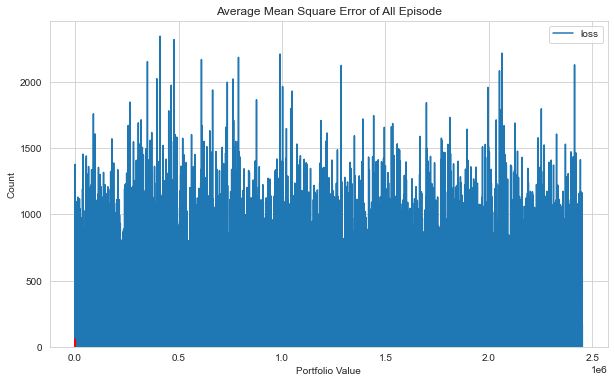

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

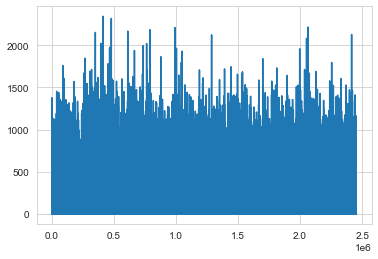

In [5]:
plt.plot(agent.model.losses)

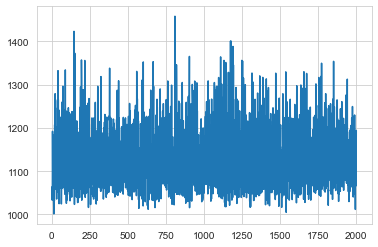

In [6]:
plt.plot(portfolio_value)

episode end value: 1083.80, duration: 0:00:00.091022
Sell: 108 times, Buy: 103 times


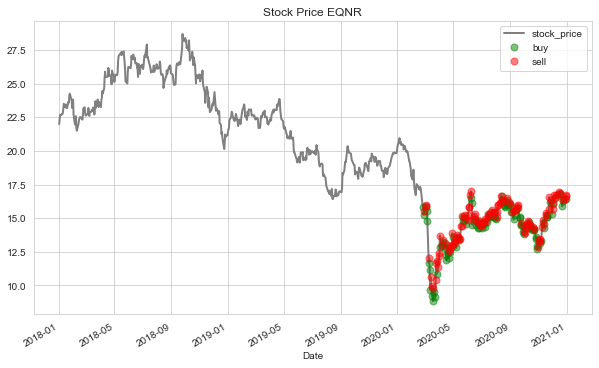

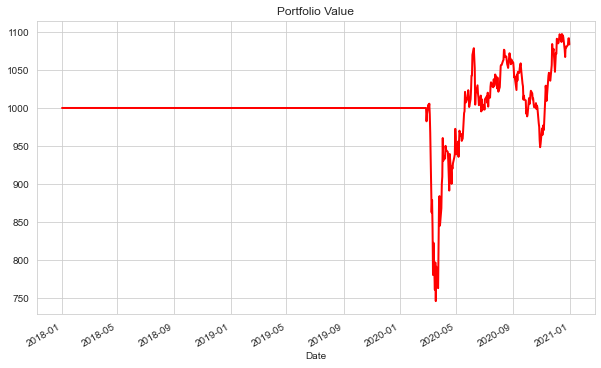

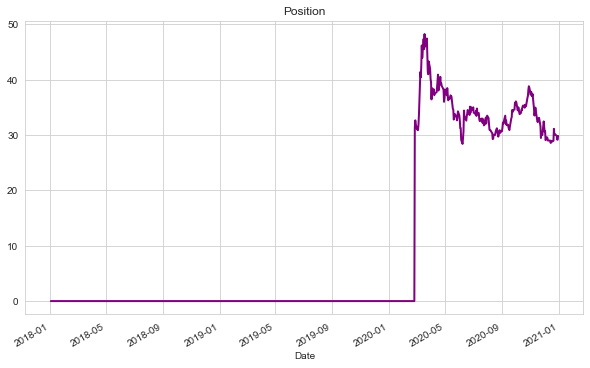

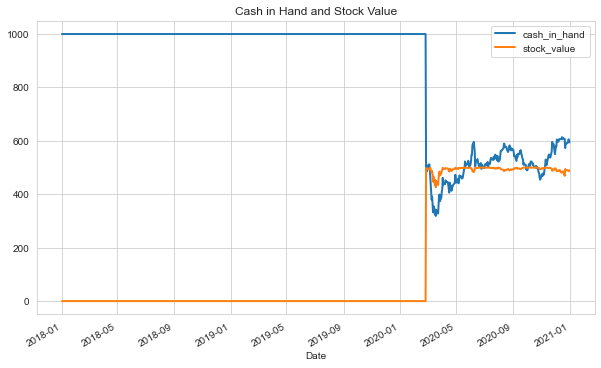

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: EQNR
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 2.72 %
Volatility: 0.1741
shape ratio: 0.0930
Maximun drawdown: -25.89 %
Calmar ratio: 0.1050
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -9.29 %
Volatility (benchmark): 0.3949
shape ratio: -0.2631
Maximun drawdown: -69.20 %
Calmar ratio (benchmark): -0.1343


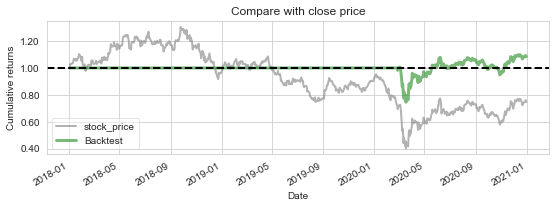

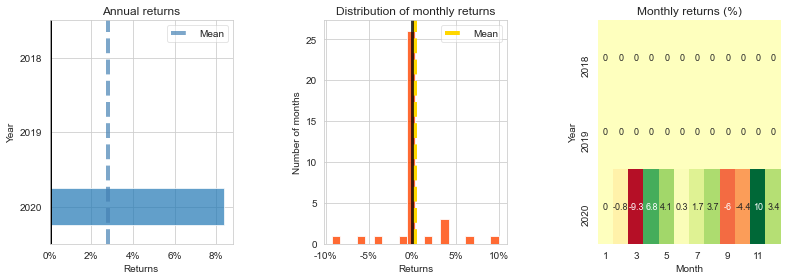

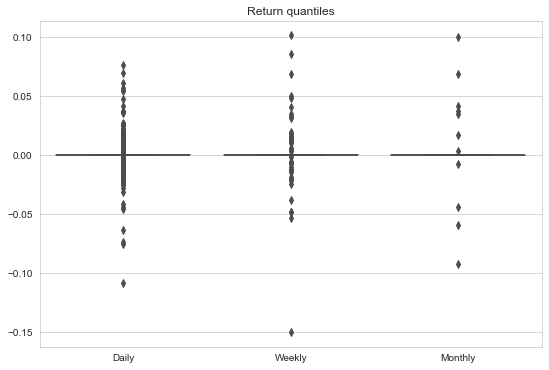

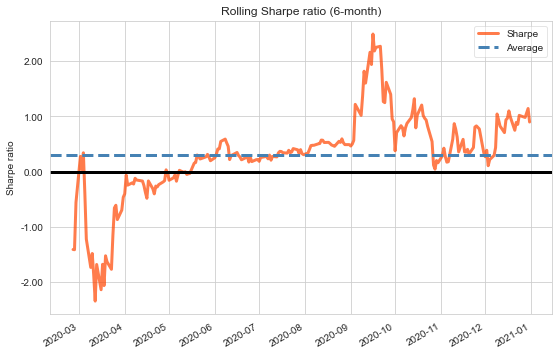

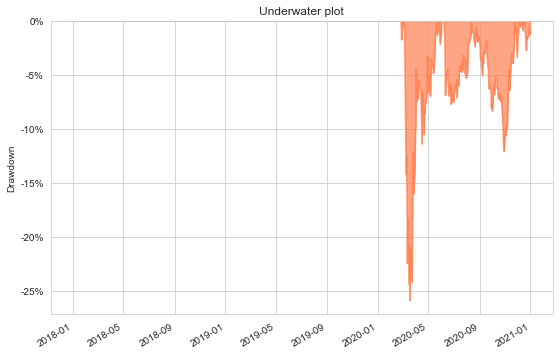

In [11]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')